# Session - 27(Machine Learning - 7)

In [ ]:
'''
In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored
in the 2013-2014 season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player
performed in the 2013-2014 NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information about average player game performance over the course
of the season. See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:
import pandas
with open("nba_2013.csv", 'r') as csvfile:
nba = pandas.read_csv(csvfile)
'''

## Load Python Modules

In [1]:
# Python modules for Data and graphical operations
import pandas as pd  # for dataframe and other data operations
import numpy as np # for numerical data data in dataframe
import matplotlib.pyplot as plt # to visualise data with matplotlib
import seaborn as sns # to visualise data with Seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Python modules for Machine learning

from sklearn.metrics import mean_absolute_error , mean_squared_error 
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.neighbors import KNeighborsRegressor , kneighbors_graph

## Load DataSet

Note : Load dataset from https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

In [4]:
# Load DataSet

with open("C:/Users/Avengers/Downloads/nba_2013.csv", 'r') as csvfile:
    df_NBA_dataset = pd.read_csv(csvfile)

print("Sample rows of dataset:")
df_NBA_dataset.head()

Sample rows of dataset:


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [5]:
# Columns of dataset
print("Columns of Dataset are")
df_NBA_dataset.columns

Columns of Dataset are


Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

### Description of dataset :
Each row in the data contains information on how a player performed in the 2013-2014 NBA season. There are many more columns in the data, mostly containing information about average player game performance over the course of the season. * player : Player's name * pos : Position of player * age : Player's age * bref_team_id : Player's team id * mp, fg, fga, fg., x3p, x3pa, x3p., x2p, x2pa, x2p., efg., ft, fta, ft., orb, drb, trb, ast, stl, blk, tov, pf m: Other repective features. * g - number of games the player was in * gs - number of games the player started * pts - total points the player scored

## Statistical and Exploratory Data Analysis

In [6]:
# Shape/Struture Of Data set 

def get_shape_of_dataset(dataframe):
    '''This Function return shape of dataset'''
    rows , cols = dataframe.shape
    shape_data="The No. Of rows in dataset : {0} & the No. Of columns in dataset : {1}" .format(rows , cols)
    return shape_data


print("Shape Of dataset")
# Apply values on function
get_shape_of_dataset(df_NBA_dataset)

Shape Of dataset


'The No. Of rows in dataset : 481 & the No. Of columns in dataset : 31'

In [7]:
# Info about dataset

def get_dataSet_info(dataframe):
    '''This function returns info about dataset columns'''
    print("Columns information about NBA Players data ")
    print("\n")
    return dataframe.info()

print("Dataset columns information")
#Apply values on function
get_dataSet_info(df_NBA_dataset)

Dataset columns information
Columns information about NBA Players data 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast

Few columns information from dataset

In [8]:
print("Few Players name")
df_NBA_dataset['player'][0:5]

Few Players name


0       Quincy Acy
1     Steven Adams
2      Jeff Adrien
3    Arron Afflalo
4    Alexis Ajinca
Name: player, dtype: object

In [9]:
print("NBA Dataset season information")
df_NBA_dataset['season'].unique()

NBA Dataset season information


array(['2013-2014'], dtype=object)

In [10]:
print("NBA Dataset season_end information")
df_NBA_dataset['season_end'].unique()

NBA Dataset season_end information


array([2013], dtype=int64)

In [11]:
print("NBA Dataset bref_team_id information")
df_NBA_dataset['bref_team_id'].unique()

NBA Dataset bref_team_id information


array(['TOT', 'OKC', 'ORL', 'NOP', 'NYK', 'POR', 'MIA', 'MEM', 'BRK',
       'PHI', 'MIL', 'ATL', 'WAS', 'GSW', 'DEN', 'HOU', 'SAS', 'BOS',
       'PHO', 'MIN', 'LAC', 'CLE', 'UTA', 'DET', 'CHA', 'DAL', 'CHI',
       'LAL', 'IND', 'TOR', 'SAC'], dtype=object)

As we can see that in NBA player's data the columns players ( contain players name) , bref_team_id (contains players team information) , season & season_end (contains session information & repeated data) all these fields are irrelevant when classification need to be done with K-nearest neighbors algorithm. Hence The fileds need to be dropped from dataset.

In [12]:
# Drop columns which are not in need 

columns_to_del = ['player','bref_team_id','season','season_end']

df_NBA_dataset = df_NBA_dataset.drop(columns=columns_to_del , axis= 1 )

print("Sample rows of dataset after Deleting column")
df_NBA_dataset.head()

Sample rows of dataset after Deleting column


,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [13]:
# Shape of dataset after column delete 
get_shape_of_dataset(df_NBA_dataset)

'The No. Of rows in dataset : 481 & the No. Of columns in dataset : 27'

In [14]:
# Trim white space in data

# trim whitespace from dataset if exist in data

def trim_whiteSpace(dataframe):
    '''This function will trim white space from dataframe (if exist)'''
    dataframe=dataframe.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  
    return dataframe

# Apply values on function to trim white space in dataset
df_NBA_dataset = trim_whiteSpace(df_NBA_dataset)

In [15]:
# Check duplicate data in dataset

df_NBA_dataset.duplicated().any()

False

In [16]:
# Check null /NA rows in data

def check_Null_values(dataframe):
    ''' This function return check null value in datafset and return null value count and precentage '''
    null_cols = dataframe.isnull().sum()
    null_percentage = round(dataframe.isnull().sum()/dataframe.isnull().count()*100 , 2)
    df= pd.concat([null_cols, null_percentage], axis=1, keys=['Total', 'NULL %'])
    return df.sort_values(by='NULL %' , ascending=False)

# Apply values on function to check values 
check_Null_values(df_NBA_dataset)

,Total,NULL %
x3p.,67,13.93
ft.,20,4.16
x2p.,3,0.62
fg.,2,0.42
efg.,2,0.42
ft,0,0.00
pf,0,0.00
tov,0,0.00
blk,0,0.00
stl,0,0.00


As we can see that features ' x3p.' , 'ft.' , 'x2p.' , 'fg.' , 'efg.' contains null values . as data belongs thus these missing values can be repalced or omitted from dataset.

In [17]:
# Sample values of ' x3p. '
df_NBA_dataset['x3p.'].unique() [0:5]

array([0.26666667,        nan, 0.42666667, 0.        , 0.2       ])

In [18]:
# Sample values of ' ft.' '
df_NBA_dataset['ft.'].unique() [0:5]

array([0.66 , 0.581, 0.639, 0.815, 0.836])

In [19]:
# Sample values of ' x2p '
df_NBA_dataset['x2p'].unique() [0:5]

array([ 62,  93, 143, 336, 136], dtype=int64)

In [20]:
# Sample values of ' fg. '
df_NBA_dataset['fg.'].unique() [0:5]

array([0.468, 0.503, 0.52 , 0.459, 0.546])

In [21]:
# Sample values of ' efg. '
df_NBA_dataset['efg.'].unique() [0:5]

array([0.482, 0.503, 0.52 , 0.522, 0.546])

In [22]:
# Fill NA /Null values ( missing value treatment)

def fill_missing_values( dataframe , col_to_fill ):
    ''' This function is used for replace null values in dataset'''
    for col in col_to_fill:
        dataframe[col].fillna(dataframe[col].median(),inplace=True)
    return dataframe

# Columns on which null values to be update
cols = ['x3p.' , 'ft.' , 'x2p.' , 'fg.' , 'efg.']
# Apply values on function tom replace null values
df_NBA_dataset = fill_missing_values( dataframe= df_NBA_dataset , col_to_fill=cols )
# Check null values after missing value treatment
df_NBA_dataset.isnull().values.any()

False

In [23]:
# Exploratory data analysis

df_NBA_dataset.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436443,39.613306,110.130977,0.291500,...,0.723607,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.147080,...,0.156898,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,...,0.657000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,...,0.816000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


## Data Visualisation

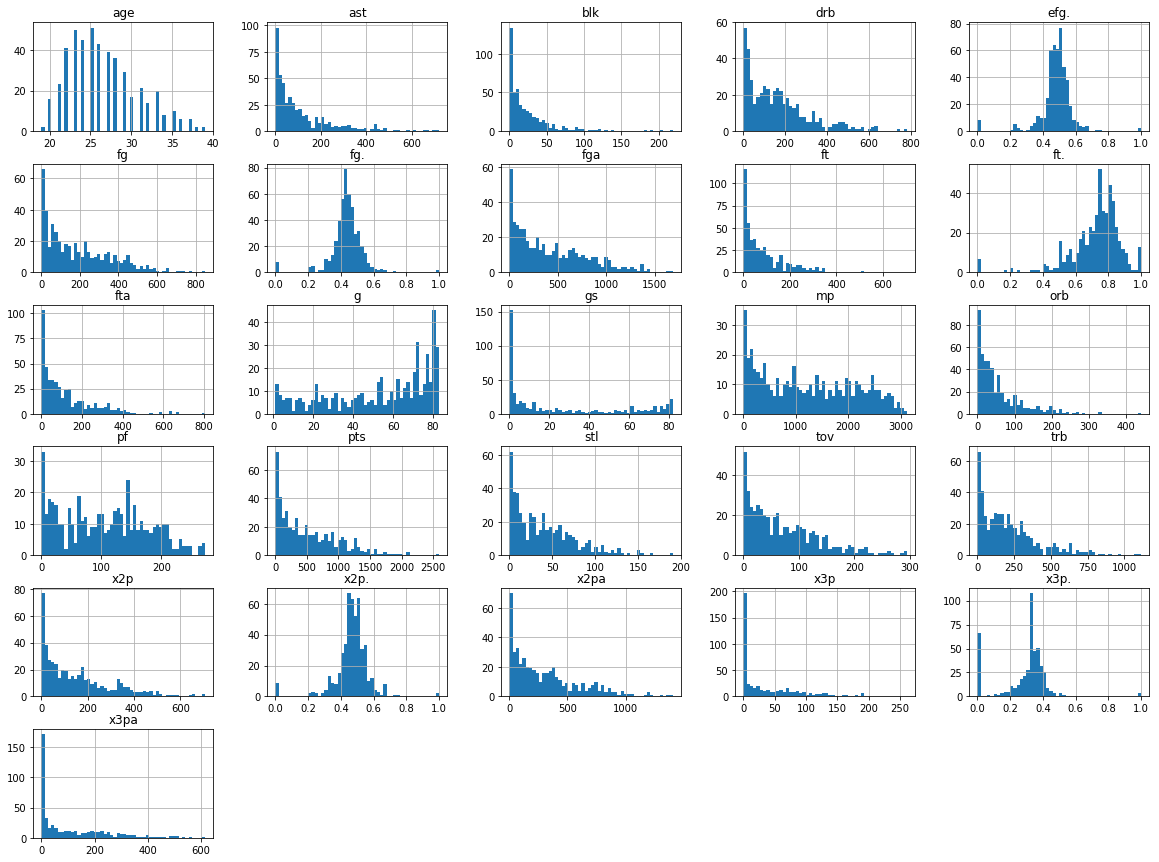

In [24]:
# Data Visualisation for Training Dataset for individual features
df_NBA_dataset.hist(bins=50, figsize=(20,15))
plt.xticks(rotation=90)
plt.show()

## Data Pre-Processing

In [25]:
# Get unique values of data set for object type of data

def get_unique_values_for_stringtype_Data(df):
    '''this function will dispaly string /categorical type data from dataset'''
    for col in df.select_dtypes(include=[np.object]).columns: # np.object is numpy variable to detect string/object type data
        print(col , " :" , df[col].unique(),"\n")
        
#Apply values on function 
get_unique_values_for_stringtype_Data(df_NBA_dataset)

pos  : ['SF' 'C' 'PF' 'SG' 'PG' 'G' 'F'] 



As we can see that in dataset 'pos' data in dataset contains object/stting values which can be repalce with numerical values. Many of machine learning algorithm would hard predict accuracy based upon those data. Thus in this process , perform "One hot encoding" to replace those string data with individual columns based on those data.

In [26]:
def get_individual_feature_cols( datafarme, objct_cols):
    '''This function will add new feature/columns based upon object columns and remove those old object columns '''
    datafarme = datafarme.join(pd.get_dummies(datafarme[objct_cols], prefix=objct_cols).iloc[:,:-1])
    datafarme=datafarme.drop(objct_cols, axis=1)
    return datafarme  


# Apply values on function

df_NBA_dataset = get_individual_feature_cols ( df_NBA_dataset , 'pos' )
df_NBA_dataset.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,171,0,0,0,0,0,1
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,57,71,203,265,1,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,36,39,108,362,0,0,0,1,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,1330,0,0,0,0,0,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,328,1,0,0,0,0,0


As our objective is to identify points (pts) scored by player in season '2013-2014', Thus select target and feature variable.

In [27]:
# Selection of points (pts) variable
df_target = df_NBA_dataset['pts']

In [28]:
# Selction of column other than ' pts '
cols_feature = [x for x in df_NBA_dataset.columns.tolist() if x !='pts']
df_Feature = df_NBA_dataset[cols_feature]

In [29]:
# Sample rows of feature dataset
df_Feature.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,stl,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,23,26,30,122,0,0,0,0,0,1
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,40,57,71,203,1,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,24,36,39,108,0,0,0,1,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,35,3,146,136,0,0,0,0,0,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,23,46,63,187,1,0,0,0,0,0


In [30]:
# Sample rows of target dataset
df_target.head()

0     171
1     265
2     362
3    1330
4     328
Name: pts, dtype: int64

### Train and Test Data

In [31]:
# Seletect Train and test dataset from feature & target dataset using 70:30 ratio
X_Train , X_Test , y_Train , y_Test= train_test_split(df_Feature , df_target , random_state=25,test_size=0.3 , shuffle=True)


print("The Shape of Feature (X_Train) Training set : ",X_Train.shape )
print("The Shape of target (y_Train) Training set : ",y_Train.shape )
print("The Shape of Feature (X_Test)  Test set : ",X_Test.shape )
print("The Shape of target (y_Test) Test set : ",y_Test.shape )

The Shape of Feature (X_Train) Training set :  (336, 31)
The Shape of target (y_Train) Training set :  (336,)
The Shape of Feature (X_Test)  Test set :  (145, 31)
The Shape of target (y_Test) Test set :  (145,)


As we have to predict points scored by player , which depends upon other several features like player gare , games he/she played , and tohers features. Thus inorder to predict points scored by player can be done through with K-Nearest Neighbor regressor.

### Apply Machine Learning Algorithm

In [32]:
# Instatiating KNN Regression Model 

from sklearn.neighbors import KNeighborsRegressor

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =  {} # Creating emplty dictionary for accuracy score


for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #Fit the model using train data
    knn.fit(X_Train, y_Train)
    
    #Getting accuracy score for different K-value on Training set
    train_accuracy[k]=knn.score(X_Train, y_Train)

In [33]:
# Model Accuracy score with K-Value
train_accuracy

{1: 1.0,
 2: 0.9891586266446848,
 3: 0.9853589126395186,
 4: 0.9828843596374411,
 5: 0.9822746390470796,
 6: 0.9792089164860184,
 7: 0.9765308507675173,
 8: 0.9737272634312061,
 9: 0.9725098421782812}

In [34]:
# Converting train_accuracy into dataframe 

df_Train_accuracy_Score = pd.DataFrame( list(zip(train_accuracy.keys() , train_accuracy.values())) , columns=['K-Value', 'Accuracy_Score']  )
df_Train_accuracy_Score

,K-Value,Accuracy_Score
0,1,1.000000
1,2,0.989159
2,3,0.985359
3,4,0.982884
4,5,0.982275
5,6,0.979209
6,7,0.976531
7,8,0.973727
8,9,0.972510


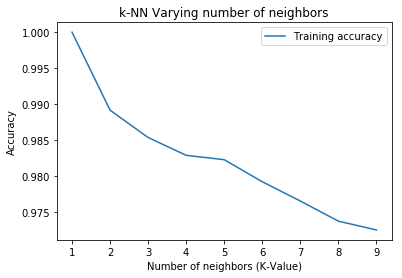

In [35]:
# Plot Between K-Value and Model Accuracy Score

plt.title('k-NN Varying number of neighbors')
plt.plot(df_Train_accuracy_Score['K-Value'], df_Train_accuracy_Score['Accuracy_Score'], label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors (K-Value)')
plt.ylabel('Accuracy')
plt.show()

As we can see that there is sharp decline Model accuracy after K-nearest Neighnor (K-value) =4 . thus again re-fit model with K-value 4

In [36]:
# Instantiating Machine learning model (k = 4)
knn_reg = KNeighborsRegressor(n_neighbors=4 , algorithm='auto', weights='uniform')
# Fitting the model
knn_reg.fit(X_Train, y_Train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [37]:
# Model Accuarcy Score on train set
accuracy_Score_train = knn_reg.score(X=X_Train, y=y_Train)
print("Model (Trains set) :",accuracy_Score_train)

Model (Trains set) : 0.9828843596374411


In [38]:
# Predict Targte variable ( points) based on features on train set
y_train_pred = knn_reg.predict(X=X_Train)
print("Predicted Sample points based on dataset")
y_train_pred[0:5]

Predicted Sample points based on dataset


array([ 193.5 , 1380.75,  280.  ,  181.  , 1052.75])

Distribution of Actual and Predicted points


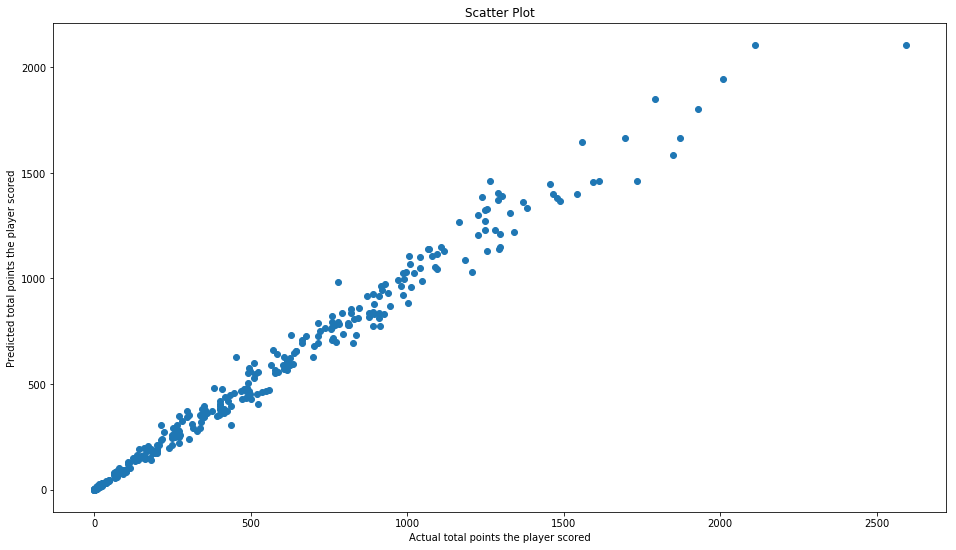

In [39]:
# Scatter plot between Actual and predict points on train set
# Scatter Plot of "Actual total points the player scored" and "Predicted total points the player scored"

print("Distribution of Actual and Predicted points")
plt.figure(figsize=(16,9))
plt.title("Scatter Plot")
plt.xlabel("Actual total points the player scored")
plt.ylabel("Predicted total points the player scored")
plt.scatter(y_Train,y_train_pred)
plt.show()

## Test Set Analysis

In [40]:
# Features ( test set)
X_Test.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,stl,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF
37,25,82,82,2956,381,819,0.465,145,402,0.360697,...,75,57,208,156,0,0,0,0,0,1
203,31,53,37,1560,299,594,0.503,1,5,0.200000,...,64,47,117,164,0,0,0,1,0,0
346,24,65,13,1533,225,489,0.460,55,151,0.364238,...,55,37,65,159,0,0,0,1,0,0
150,30,81,78,2485,361,875,0.413,189,498,0.379518,...,67,39,145,205,0,0,0,0,0,0
302,37,58,2,982,106,231,0.459,11,21,0.523810,...,34,9,61,75,0,0,0,0,0,0


In [41]:
# target ( test set)
y_Test.head()

37     1070
203     754
346     555
150    1068
302     283
Name: pts, dtype: int64

In [42]:
# Model Accuarcy Score on test set

accuracy_Score_test = knn_reg.score(X=X_Test, y=y_Test)
print("Model (Test Set) : ",accuracy_Score_test)

Model (Test Set) :  0.9752721285759218


In [43]:
# Predicting "total points the player scored" using test data set on test set
y_test_pred = knn_reg.predict(X_Test)
print("Predicted Sample points based on dataset(test set)")
y_test_pred[0:5]

Predicted Sample points based on dataset(test set)


array([1151.25,  709.25,  579.75, 1033.5 ,  283.  ])

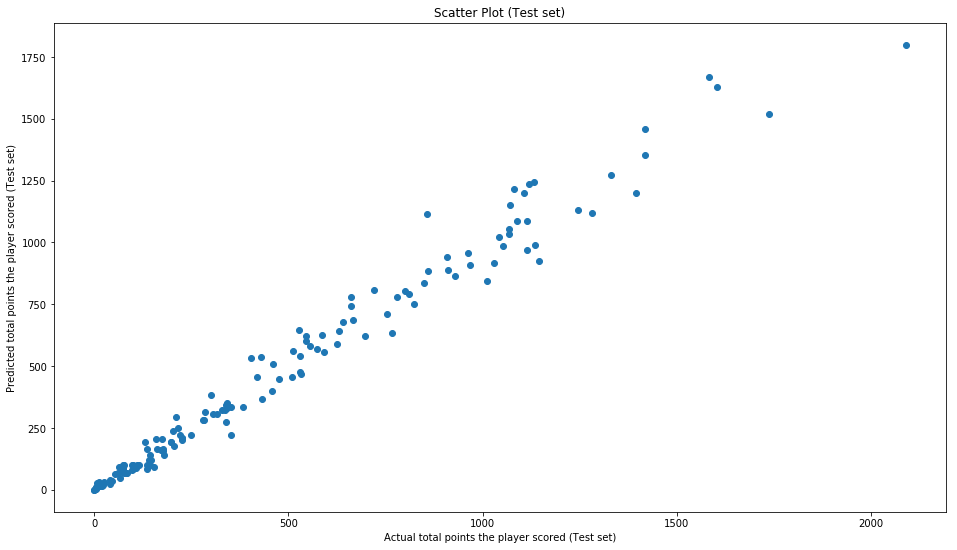

In [44]:
# Scatter plot between Actual and predict points on train set
# Scatter Plot of "Actual total points the player scored" and "Predicted total points the player scored"

plt.figure(figsize=(16,9))
plt.title("Scatter Plot (Test set)")
plt.xlabel("Actual total points the player scored (Test set)")
plt.ylabel("Predicted total points the player scored (Test set)")
plt.scatter(y_Test,y_test_pred)
plt.show()

## Model Evaluation

In [45]:
# Regression model evaluation on Training dataset

from math import sqrt
mean_absolute_error_train = mean_absolute_error(y_Train,y_train_pred)

mean_sqaured_error_train= mean_squared_error(y_Train,y_train_pred)

root_mean_sqaured_error_train = sqrt(mean_sqaured_error_train)

print('Mean Absolute Error on Train dataset:', mean_absolute_error_train)  
print('Mean Squared Error on Train dataset:', mean_sqaured_error_train)  
print('Root Mean Squared Error on Train dataset:', root_mean_sqaured_error_train)

Mean Absolute Error on Train dataset: 37.830357142857146
Mean Squared Error on Train dataset: 3929.0145089285716
Root Mean Squared Error on Train dataset: 62.68185151165026


In [46]:
# Regression model evaluation on Test dataset

mean_absolute_error_test = mean_absolute_error(y_Test,y_test_pred)

mean_sqaured_error_test = mean_squared_error(y_Test,y_test_pred)

root_mean_sqaured_error_test = sqrt(mean_sqaured_error_test)

print('Mean Absolute Error on Test dataset:', mean_absolute_error_test)  
print('Mean Squared Error on Test dataset:', mean_sqaured_error_test)  
print('Root Mean Squared Error on Test dataset:', root_mean_sqaured_error_test)

Mean Absolute Error on Test dataset: 45.543103448275865
Mean Squared Error on Test dataset: 4934.975431034482
Root Mean Squared Error on Test dataset: 70.24938028932698


## Model Tuning using Gridsearch CV

In [47]:
from sklearn.model_selection import GridSearchCV
neighbor_params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()
# Selecting GridSearchCV with KNN model
modelSearch_GrdCV = GridSearchCV(knn, neighbor_params, cv=10)
modelSearch_GrdCV.fit(X_Train,y_Train)
modelSearch_GrdCV.best_params_

{'n_neighbors': 4}

In [48]:
print("Model Accuracy Score:")
modelSearch_GrdCV.score(X_Test, y_Test)

Model Accuracy Score:


0.9752721285759218

## Kneighbors_Graph

In [49]:
from sklearn.neighbors import kneighbors_graph

A = kneighbors_graph(X=X_Train , n_neighbors= 4,mode='connectivity',include_self=True)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

After Model tuning with GridSearchCV it returned K- Value for K Nearest Neighbor algorithm (Regression) is 4. which already have been used for model prediction. Thus a knn regressor with number of neighbors as 4 achieves the best score/accuracy of 0.9752 i.e about 97.52%